<a href="https://colab.research.google.com/github/Ajay07pandey/Cardiovascular-Risk-Prediction/blob/main/Ajay_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Cardiovascular Risk Prediction
##### **Contribution**    - **Individual**
**Ajay pandey**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [67]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [68]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_csv ('/content/drive/MyDrive/Capstone project/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [70]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [71]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [72]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [73]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool

In [74]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [75]:
# Missing Values/Null Values Count
df.isnull().any()

id                 False
age                False
education           True
sex                False
is_smoking         False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

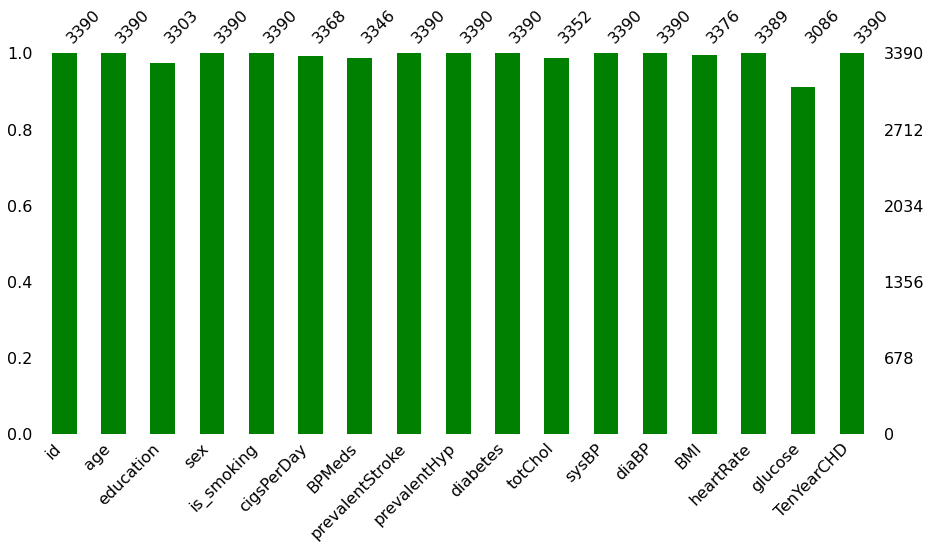

In [76]:
# Visualizing the missing values
msno.bar(df,figsize=(15,7),color = 'green')

### What did you know about your dataset?

1. Data set have **3390 rows** and **17 column**
2. **No duplicate** value in the data set
3. Some missing values are present in **Education,Cigperday,BPmeds,totchol,BMI,heartRate,glucose**

## ***2. Understanding Your Variables***

In [77]:
# Dataset Columns
df.columns[:]

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [78]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

1. Sex: male or female ("M" or "F")
2. Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education: The level of education of the patient (categorical values - 1,2,3,4)
4. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
5. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
6. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
7. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
8. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
9. Diabetes: whether or not the patient had diabetes (Nominal)
10. Tot Chol: total cholesterol level (Continuous)
11. Sys BP: systolic blood pressure (Continuous)
12. Dia BP: diastolic blood pressure (Continuous)
13. BMI: Body Mass Index (Continuous)
14. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
15. Glucose: glucose level (Continuous)
16. 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [79]:
# Check Unique Values for each variable.
# creating a function for unique values
def unique_values():
  for i in df.columns.tolist() :
   print("Unique values in",i,":",df[i].nunique())

In [80]:
unique_values()

Unique values in id : 3390
Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigsPerDay : 32
Unique values in BPMeds : 2
Unique values in prevalentStroke : 2
Unique values in prevalentHyp : 2
Unique values in diabetes : 2
Unique values in totChol : 240
Unique values in sysBP : 226
Unique values in diaBP : 142
Unique values in BMI : 1259
Unique values in heartRate : 68
Unique values in glucose : 132
Unique values in TenYearCHD : 2


Defining 3 lists containing the column names of 
 a. Dependent variables
 b. continuous independent variables
 c. categorical independent variables
 This is defined based on the number of unique values for each attribute

1. Dependent_var = ['TenYearCHD']
2. continuous_var = ['age','cigsperday','totchol','sysbp', 'diabp', 'BMI', 'heartRate', 'glucose']
3. categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

##***3. Data Wrangling***

### Data Wrangling Code

In [81]:
# Write your code to make your dataset analysis ready.

In order to impute the null values with the various statistical value (Mean, Median, Mode) we have to check the following things:
1. Distribution of data
2. Outliers in the data

In [82]:
# Dropping the first id column 
df.drop(['id'] , axis = 1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [83]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

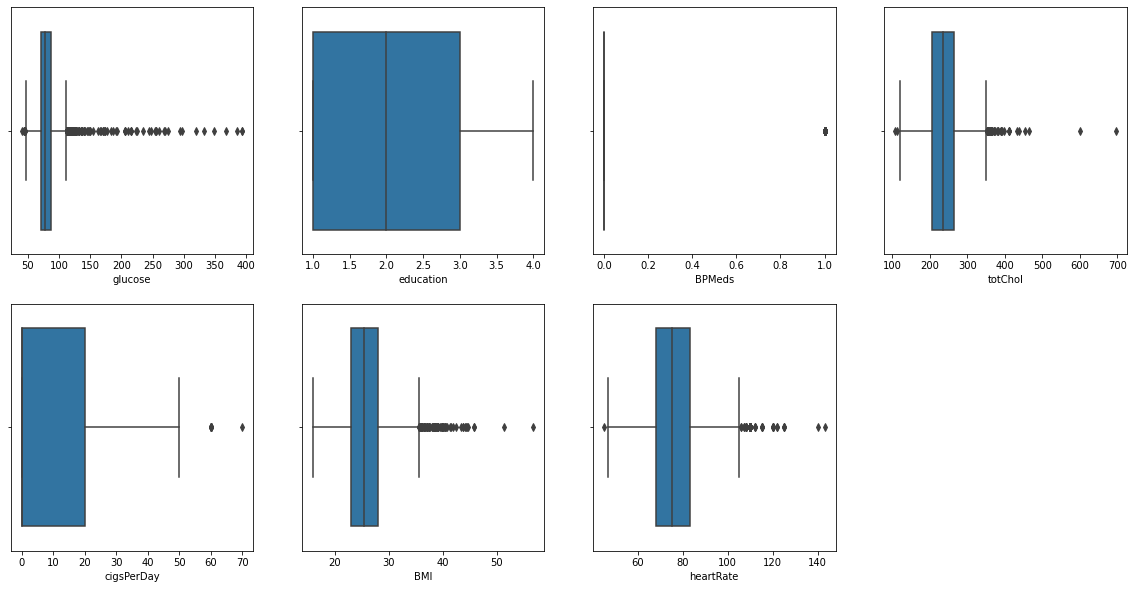

In [84]:
# Plotting the box plot and observe the outliers in the columns having null values
plt.figure(figsize=(20,10))
for i,j in enumerate(null_list):
  plt.subplot(2,4,i+1)
  sns.boxplot(df[j])
plt.show()
# plt.Figure(figsize=(15,8))
# sns.boxplot(df(null_list))
# # df[null_list].boxplot()

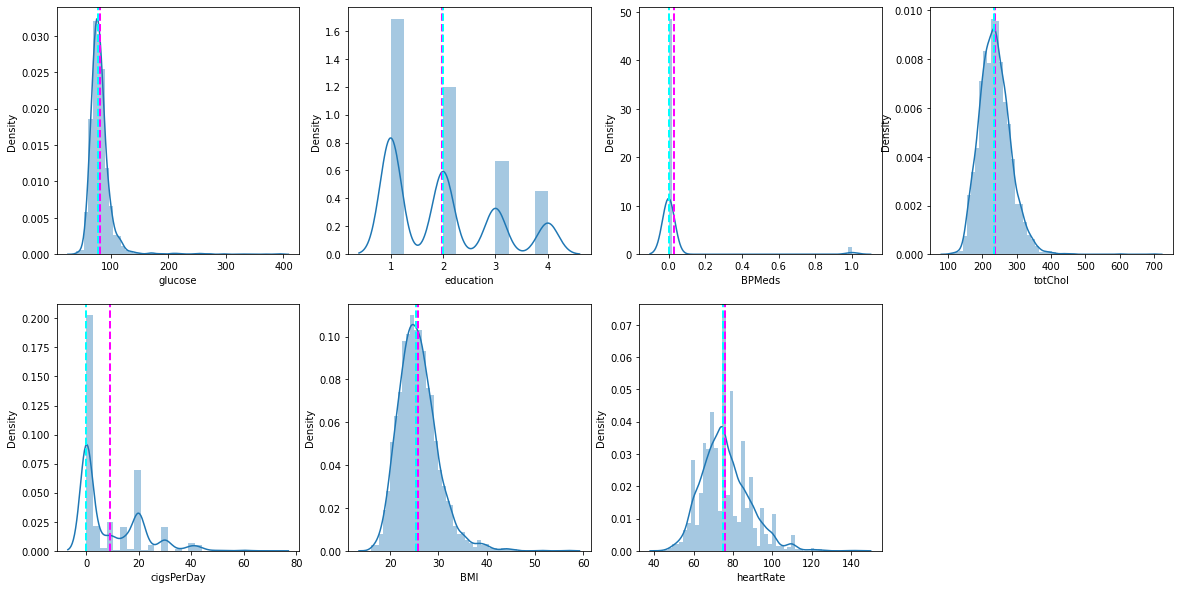

In [85]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,10))
for i,j in enumerate(null_list):
  plt.subplot(2,4,i+1)
  sns.distplot(df[j])
  plt.axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[j].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

We know that:
1. Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used  when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

By checking the outliers and distribution of the data we are going to impute the null values of:
1. "glucose" -> Median
2. "education" -> Mode
3. "BPMeds" -> Mode
4. "totChol" -> Median
5. "cigsPerDay" -> Median
6. "BMI" -> Median
7. "heartRate" -> Median

In [86]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [87]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Defining 3 lists containing the column names of
1. Dependent variables 
2. continuous independent variables 
3. categorical independent variables 

This is defined based on the number of    unique values for each attribute.

In [88]:
Dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univeriate

#### Chart - 1 (TenYearCHD)

In [89]:
type(df['TenYearCHD'])

pandas.core.series.Series

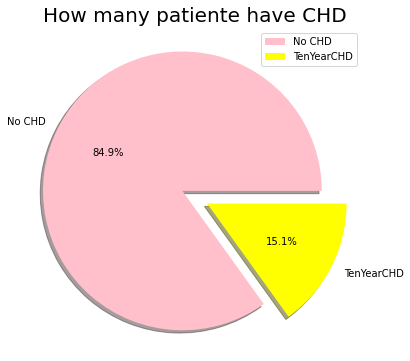

In [90]:
#Plot for dependent variable
labels = 'No CHD' , 'TenYearCHD'
sizes = df.TenYearCHD.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many patiente have CHD",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 (Analysing the distribution of continous variable)

In [ ]:
# for i,j in enumerate(continuous_var):
#   plt.figure(figsize=(20,10))
#   plt.subplot(2,4,i+1)
#   sns.histplot(df[j])
#   plt.axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
#   plt.axvline(df[j].median(), color='cyan', linestyle='dashed', linewidth=2)
#   plt.title(j +' distribution')
#   plt.show()

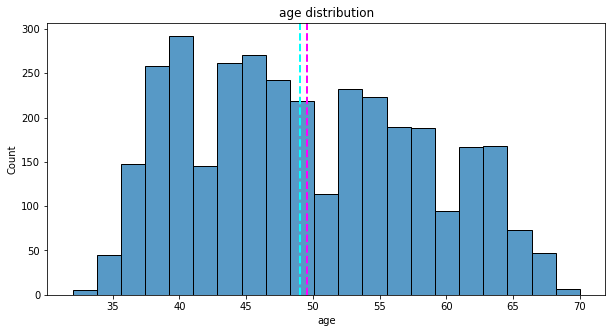

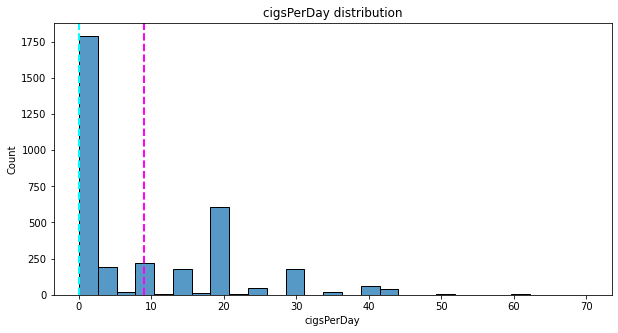

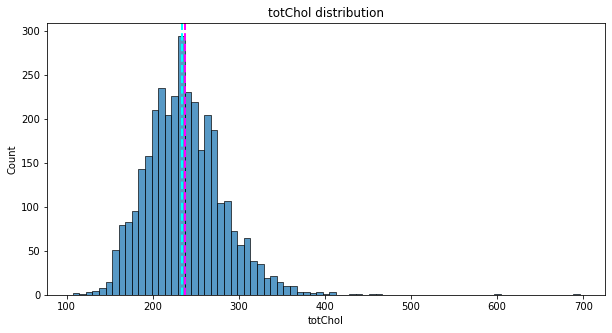

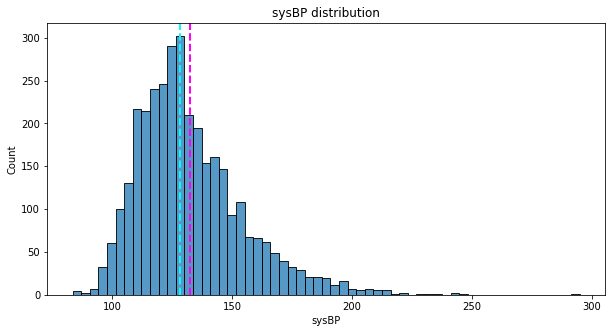

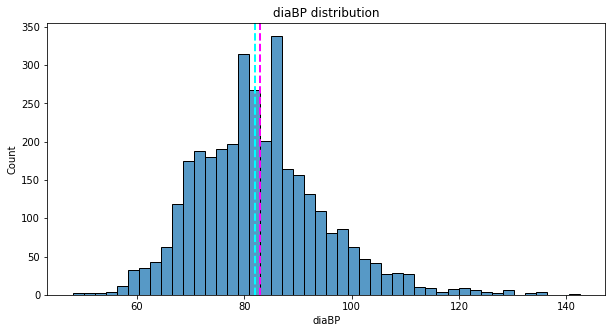

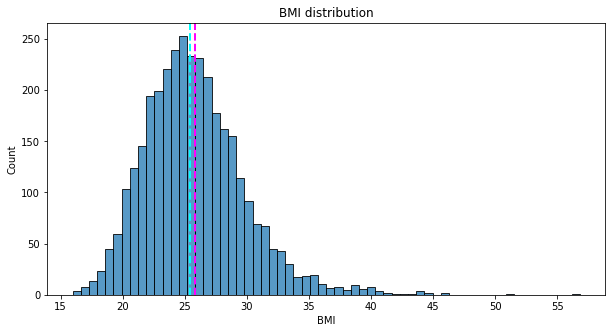

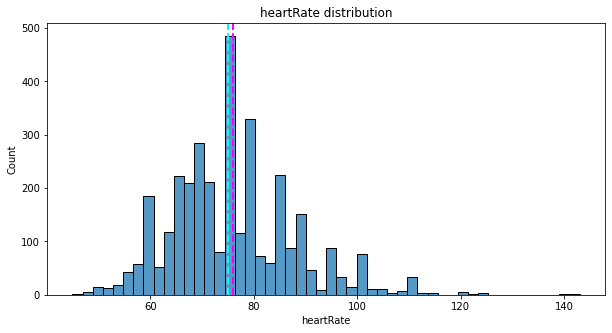

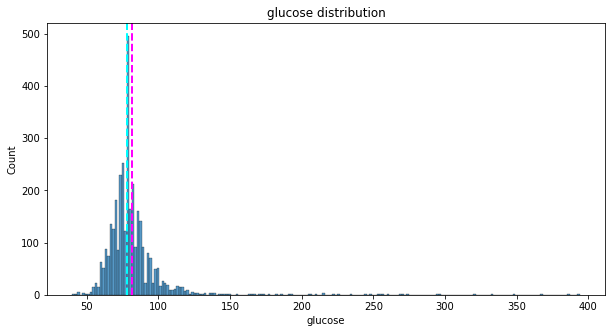

In [92]:
# continuous_var = ['age','cigsperday','totchol','sysbp', 'diabp', 'BMI', 'heartRate', 'glucose']
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3(Analyzing the distribution of the discrete independent variables)

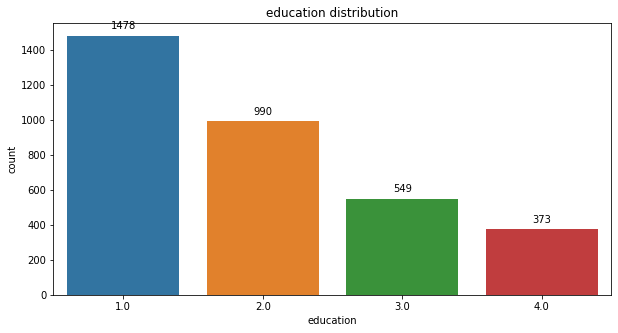

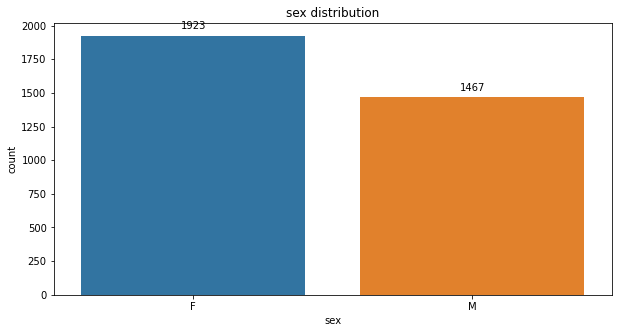

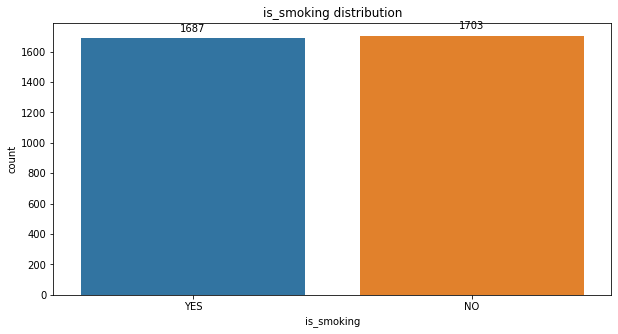

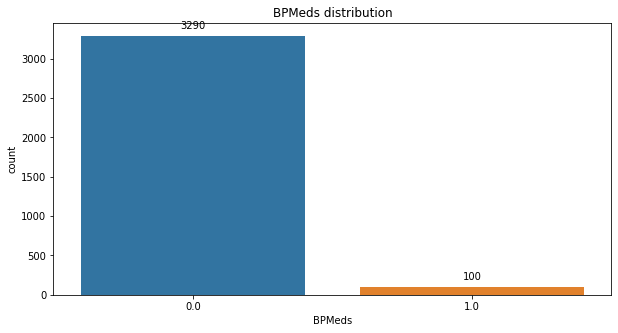

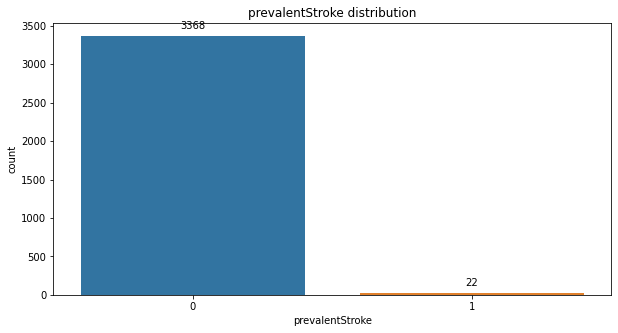

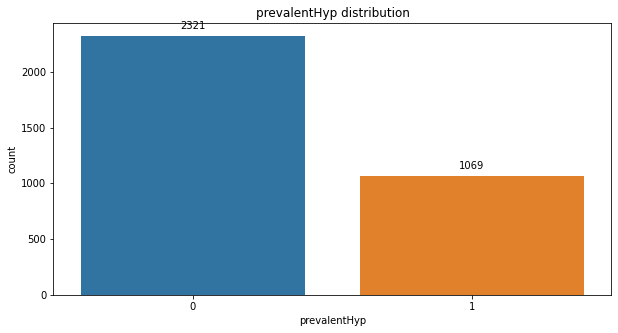

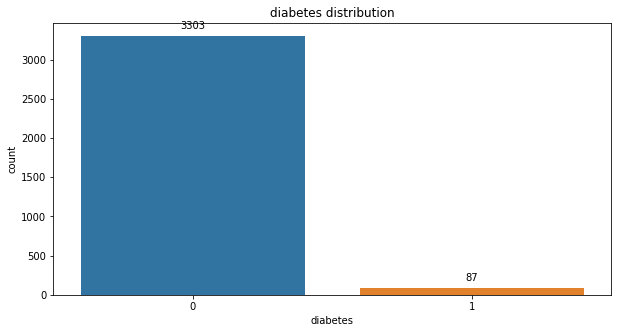

In [93]:
# Chart - 3 visualization code
# categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
for i in categorical_var:
  plt.figure(figsize=(10,5))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## Bivariate

#### Chart - 4(Relation of continous variable with CHD)

In [ ]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)


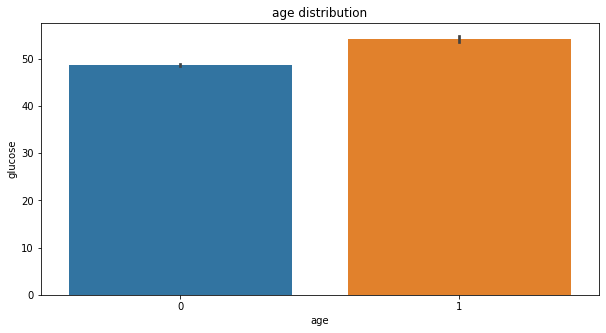

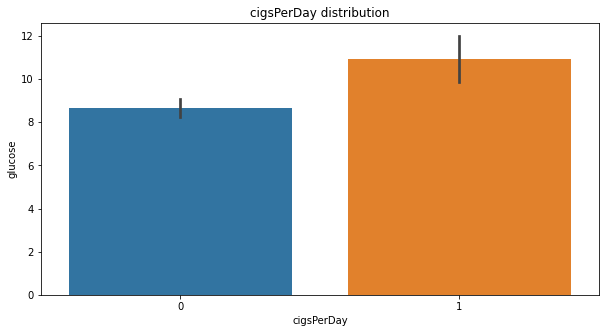

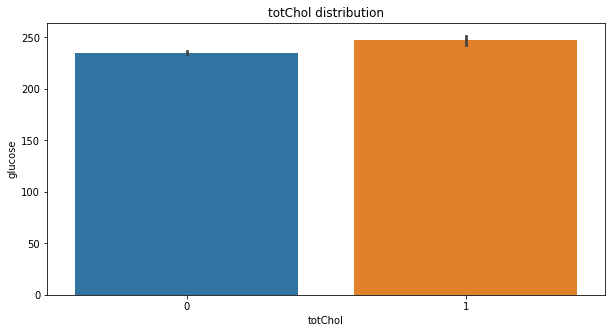

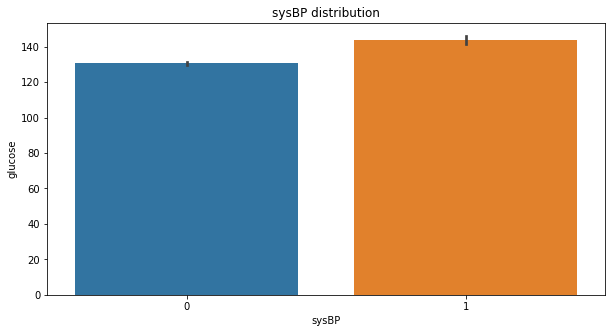

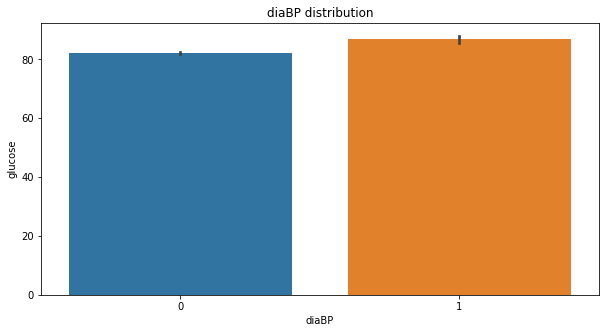

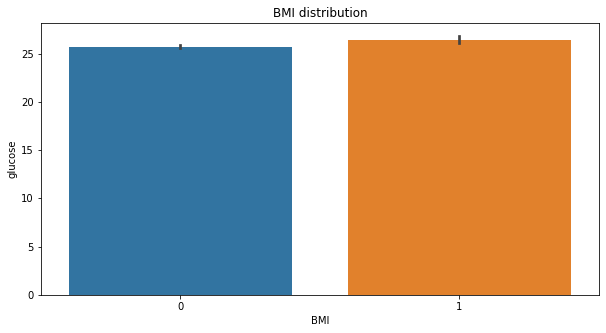

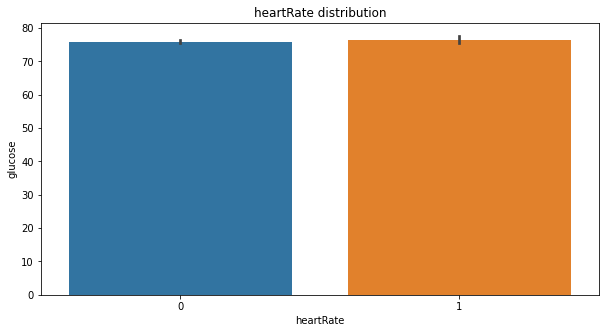

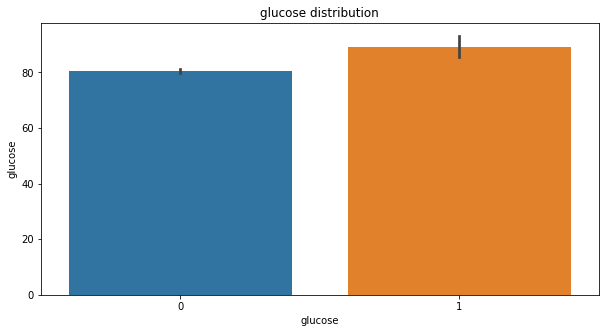

In [102]:
# Chart - 4 visualization code
# TenYearCHD vs cigsPerDay
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.barplot(y=df[i],x=df['TenYearCHD'])
  plt.ylabel(j)
  plt.xlabel(i)
  plt.title(i+' distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5(Analysis for categorical features)

In [95]:
# Chart - 5 visualization code
categorical_var


['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

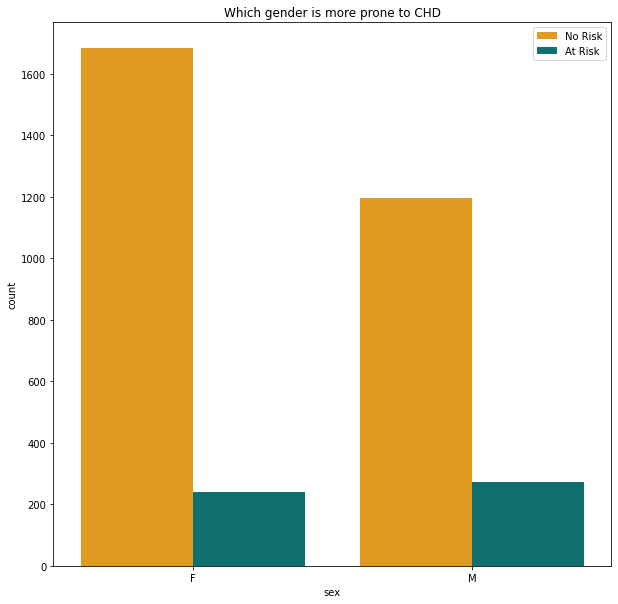

In [96]:

my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue=df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6(prevalentStroke vs TenYearCHD)

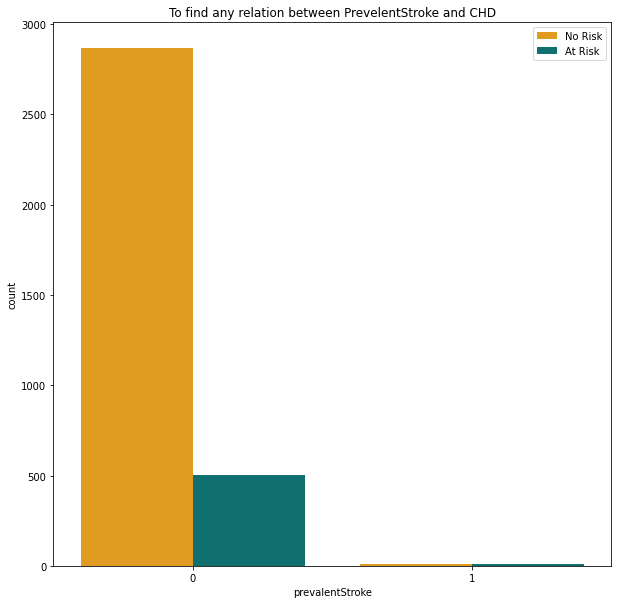

In [112]:
# Chart - 6 visualization code
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['prevalentStroke'], hue=df['TenYearCHD'], palette = my_palette)
plt.title("To find any relation between PrevelentStroke and CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7( which age group is vulnerable to CHD

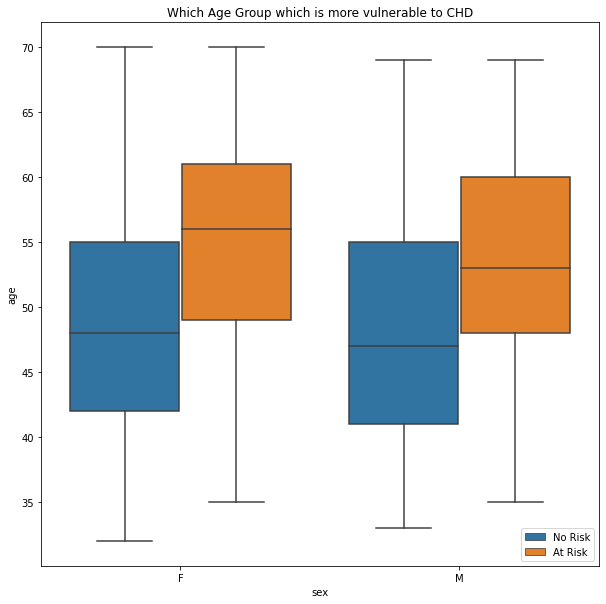

In [125]:
# Chart - 7 visualization code
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'])
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8(Total cholestrol vs CHD)

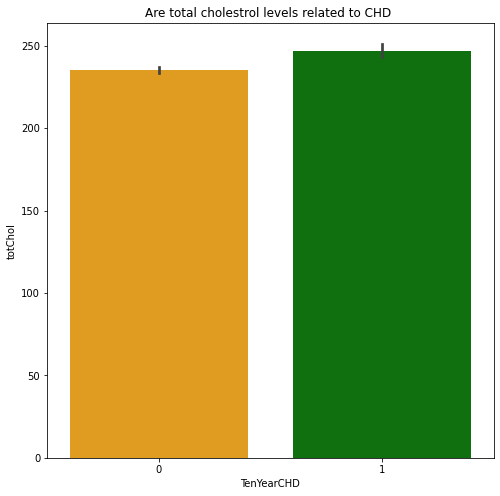

In [133]:
# Chart - 8 visualization code
colour = {0: 'orange' , 1: 'green'}
plt.figure(figsize = (8,8))
sns.barplot(df['TenYearCHD'], df['totChol'], palette = colour)
plt.title("Are total cholestrol levels related to CHD ")
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9(HeartRate vs CHD Probablity)

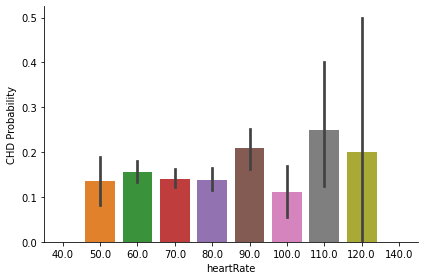

In [138]:
# Chart - 9 visualization code
df['heartRate'] = df['heartRate'].apply(lambda x : 10*(x//10))
ax = sns.factorplot('heartRate', 'TenYearCHD', kind='bar', data = df, size=4, aspect=1.5)
ax.set_ylabels('CHD Probability')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

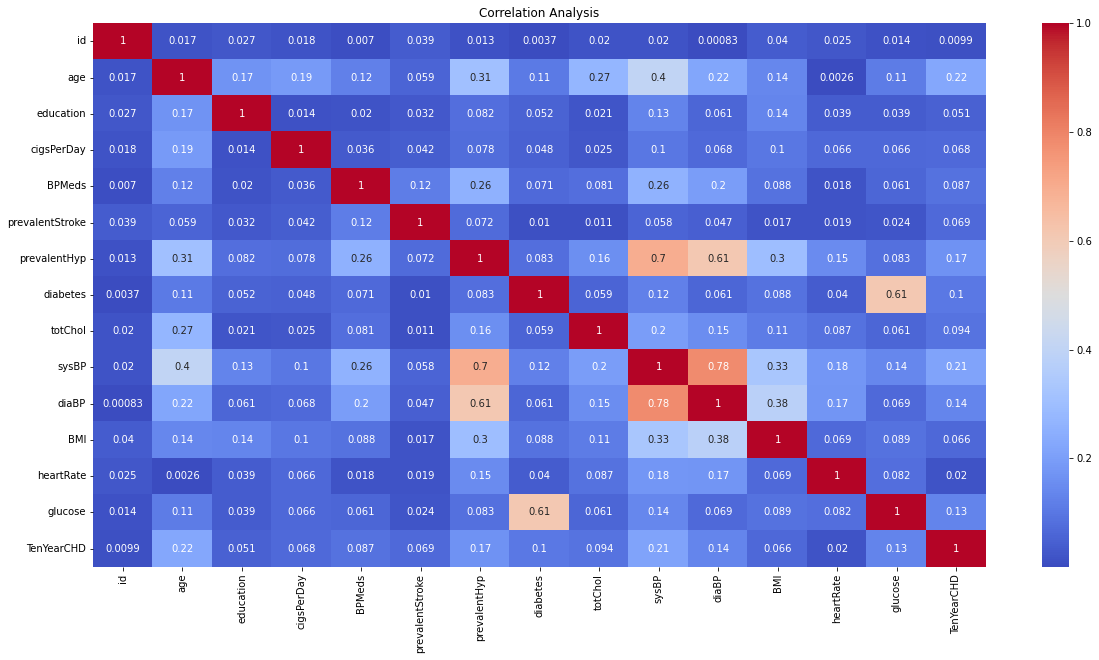

In [50]:
# Correlation magnitude
plt.figure(figsize=(20,10))
plt.title('Correlation Analysis')
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

<Figure size 720x360 with 0 Axes>

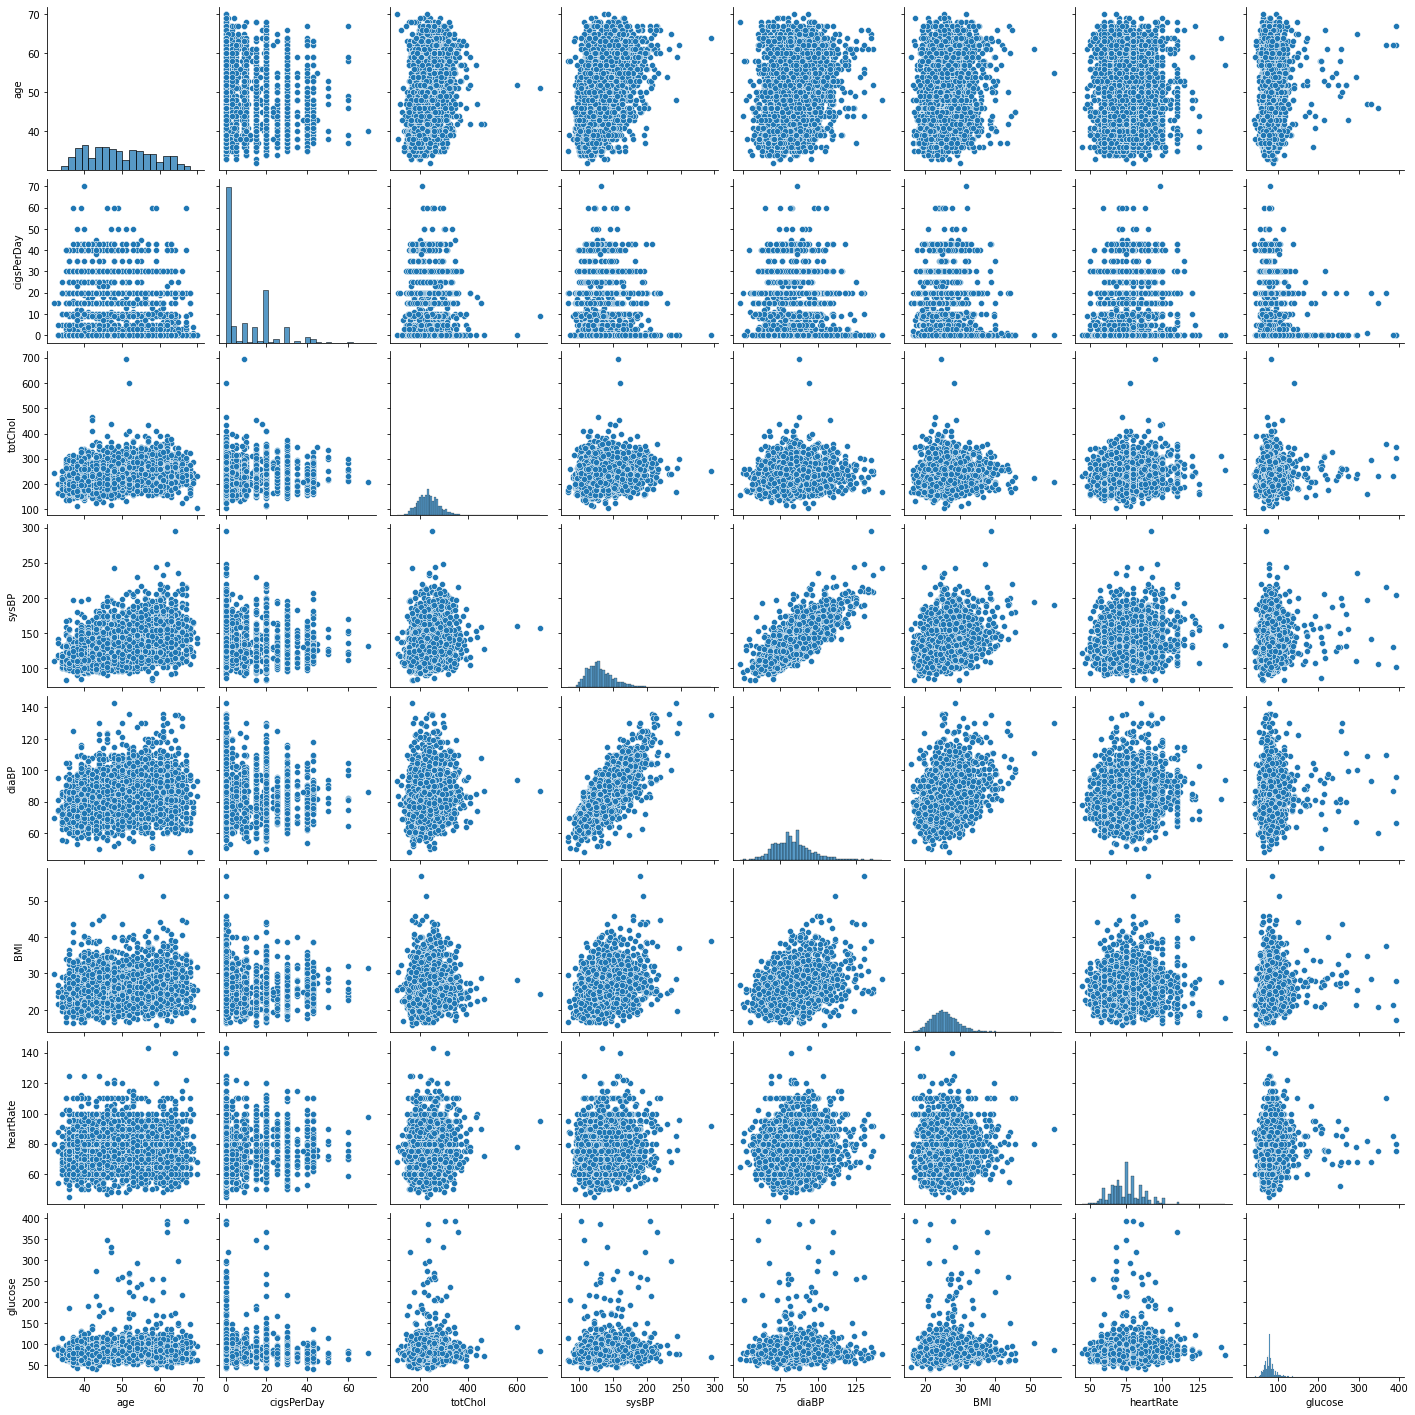

In [124]:
plt.figure(figsize=(10,5))
sns.pairplot(df[continuous_var])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***